**1.)** Extract XBP1 and GATA3 expression levels in all hundred plus patients, and generate the scatter plot as seen in 1a 

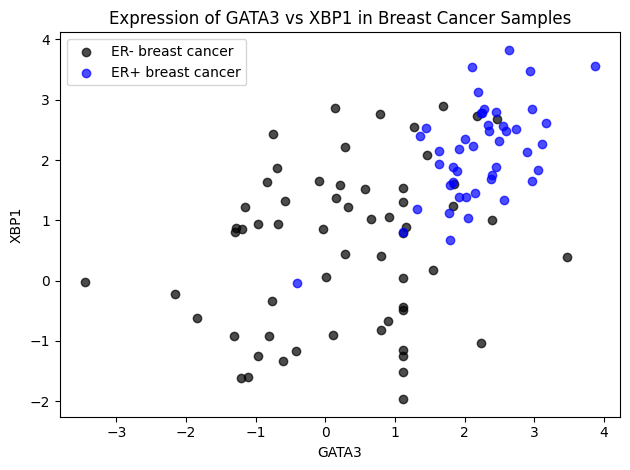

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# loading input data from TSV files
expression_data = pd.read_csv("filtered.tsv", sep="\t")
labels = pd.read_csv("class.tsv", sep="\t", header=None)
gene_info = pd.read_csv("columns.tsv", sep="\t", comment="#")

# extract gene IDs for GATA3 and XBP1
gata3_id = gene_info.loc[gene_info['GeneSymbol'] == 'GATA3', 'ID'].values[0]
xbp1_id = gene_info.loc[gene_info['GeneSymbol'] == 'XBP1', 'ID'].values[0]

# match formatting with column names in expression data
gata3_col = " " + str(gata3_id)
xbp1_col = " " + str(xbp1_id)

# Retrieve expression levels and class labels
gata3_values = expression_data[gata3_col].values
xbp1_values = expression_data[xbp1_col].values
sample_labels = labels[0].values

# Separate samples by label
is_negative = (sample_labels == 0)
is_positive = (sample_labels == 1)

# Create scatter plot
plt.scatter(gata3_values[is_negative], xbp1_values[is_negative], 
            color='black', alpha=0.7, label='ER- breast cancer')
plt.scatter(gata3_values[is_positive], xbp1_values[is_positive], 
            color='Blue', alpha=0.7, label='ER+ breast cancer')

plt.xlabel("GATA3")
plt.ylabel("XBP1")
plt.title("Expression of GATA3 vs XBP1 in Breast Cancer Samples")
plt.legend()
plt.tight_layout()
plt.show()



**2.)** Run PCA on the matrix and project these 2-D points on PC1


Procedure for Performing PCA:
Standardize the data by subtracting the mean from each feature

Calculate the covariance matrix to understand feature relationships

Determine the eigenvalues and eigenvectors of the covariance matrix

Rank the eigenvectors based on their corresponding eigenvalues in descending order

Select the top two eigenvectors, which serve as the first and second principal components

[3.07186142 0.87054073]


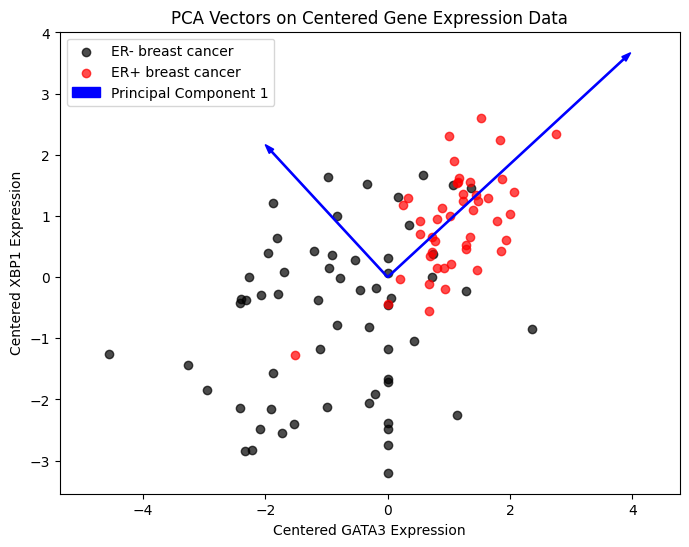

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the gene expression data
x_data = X
y_data = Y
labels = Z

# Combine x and y into a single 2D array
points = np.column_stack((x_data, y_data))

# Step 1: Subtract mean to center data
mean_vals = np.mean(points, axis=0)
centered_points = points - mean_vals

# Step 2: Calculate covariance matrix
cov_mat = np.cov(centered_points, rowvar=False)

# Step 3: Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print(eigenvalues)

# Step 4: Sort eigenvectors based on descending eigenvalues
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Step 5: Extract principal components and explained variances
principal_axes = eigenvectors.T
variance_explained = eigenvalues

# Step 6: Create masks for each cancer type
mask_er_negative = (labels == 0)
mask_er_positive = (labels == 1)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(centered_points[mask_er_negative, 0], centered_points[mask_er_negative, 1],
            color='black', alpha=0.7, label='ER- breast cancer')
plt.scatter(centered_points[mask_er_positive, 0], centered_points[mask_er_positive, 1],
            color='red', alpha=0.7, label='ER+ breast cancer')

# Plot PCA vectors
for idx in range(2):
    plt.arrow(0, 0,
              principal_axes[idx, 0] * np.sqrt(variance_explained[idx]) * 3,
              principal_axes[idx, 1] * np.sqrt(variance_explained[idx]) * 3,
              color='blue', width=0.02, head_width=0.1,
              label=f'Principal Component {idx+1}' if idx == 0 else None)

plt.xlabel("Centered GATA3 Expression")
plt.ylabel("Centered XBP1 Expression")
plt.title("PCA Vectors on Centered Gene Expression Data")
plt.legend()
plt.axis('equal')
plt.show()


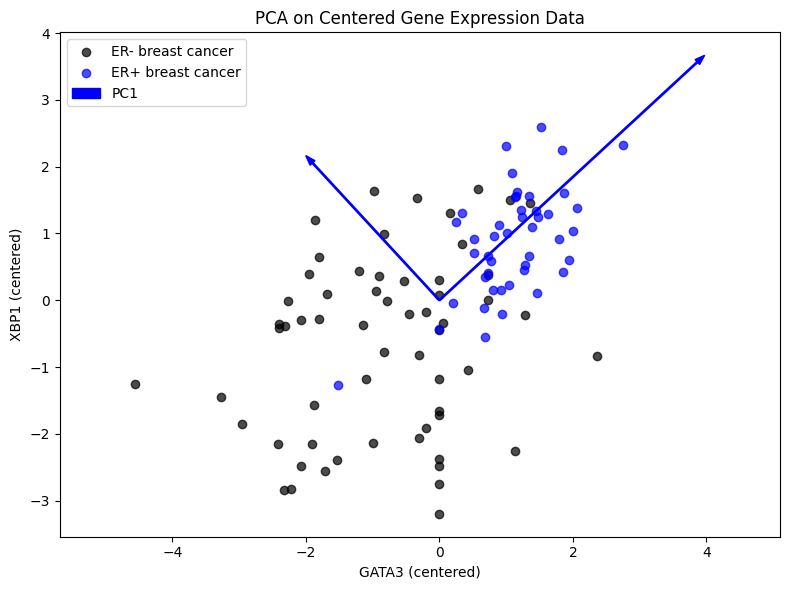

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load gene expression data
x_gene = X
y_gene = Y
labels = Z

# Combine X and Y gene expressions into a 2D dataset
gene_data = np.column_stack((x_gene, y_gene))

# Center the data by subtracting the mean
mean_vals = np.mean(gene_data, axis=0)
centered_data = gene_data - mean_vals

# Calculate the covariance matrix of the centered data
cov_matrix = np.cov(centered_data.T)

# Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and associated eigenvectors in descending order
sorted_order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_order]
eigenvectors = eigenvectors[:, sorted_order]

# Extract principal components and variance explained
principal_components = eigenvectors.T
variance_explained = eigenvalues

# Define class labels
label_er_negative = (labels == 0)
label_er_positive = (labels == 1)

# Visualize the data and principal components
plt.figure(figsize=(8, 6))

plt.scatter(centered_data[label_er_negative, 0], centered_data[label_er_negative, 1],
            color='black', alpha=0.7, label='ER- breast cancer')
plt.scatter(centered_data[label_er_positive, 0], centered_data[label_er_positive, 1],
            color='blue', alpha=0.7, label='ER+ breast cancer')

# Overlay the principal component directions
for idx in range(2):
    plt.arrow(0, 0,
              principal_components[idx, 0] * np.sqrt(variance_explained[idx]) * 3,
              principal_components[idx, 1] * np.sqrt(variance_explained[idx]) * 3,
              color='blue', width=0.02, head_width=0.1,
              label=f'PC{idx + 1}' if idx == 0 else None)

plt.xlabel("GATA3 (centered)")
plt.ylabel("XBP1 (centered)")
plt.title("PCA on Centered Gene Expression Data")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


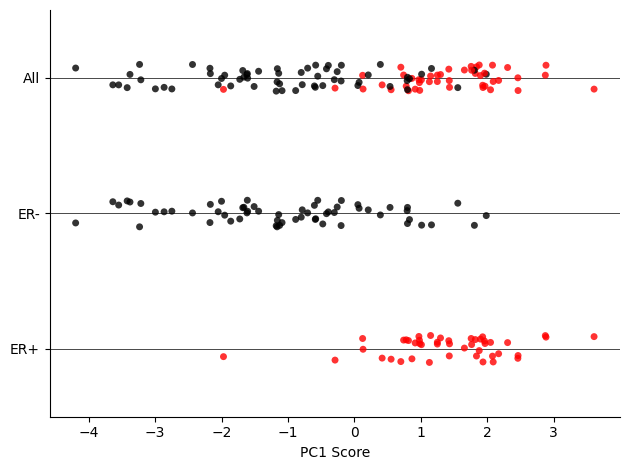

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Project the centered data onto the first principal component
first_pc = eig_vecs[:, 0]
pc1_scores = data_centered @ first_pc

# Create dataframes for plotting: full set, ER-, and ER+ groups
df_combined = pd.DataFrame({
    "PC1": pc1_scores,
    "Subtype": "All",
    "Color": np.where(Z == 0, "black", "red")
})

df_negative = pd.DataFrame({
    "PC1": pc1_scores[Z == 0],
    "Subtype": "ER-",
    "Color": "black"
})

df_positive = pd.DataFrame({
    "PC1": pc1_scores[Z == 1],
    "Subtype": "ER+",
    "Color": "red"
})

# Concatenate the individual group dataframes into a single plot-ready dataframe
final_df = pd.concat([df_combined, df_negative, df_positive], ignore_index=True)

# Generate strip plot with jitter to visualize PC1 projections
plot = sns.stripplot(data=final_df, x="PC1", y="Subtype", hue="Color",
                     palette={"black": "black", "red": "red"},
                     dodge=False, jitter=True, alpha=0.8, size=5)

# Customize plot appearance
plot.yaxis.grid(True, linestyle='-', color='black', linewidth=0.5)
plt.xlabel("PC1 Score")
plt.ylabel("")
plt.legend([], [], frameon=False)  
sns.despine()
plt.tight_layout()
plt.show()
